### **Name: Rabia Akhtar**

### **Project: Titanic EDA**

## **Import the necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

## **Load the dataset**

In [3]:
full_data = sns.load_dataset('titanic')

In [4]:
full_data.to_csv('full_data.csv')

## **Understand the data**

In [5]:
full_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
full_data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [7]:
full_data.shape

(891, 15)

In [8]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
full_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
full_data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## **Dropping the missing or null values**

In [11]:
print(full_data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


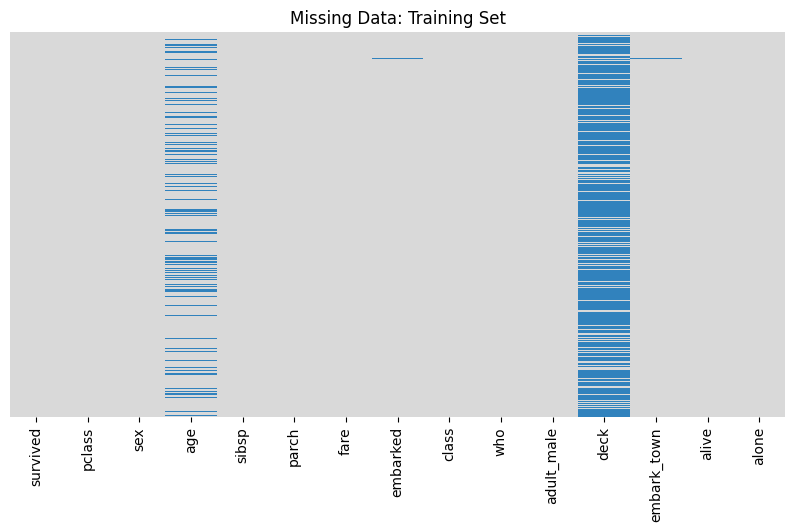

In [12]:
# Heatmap
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [13]:
# Remove deck feature
full_data.drop('deck', axis = 1, inplace = True)

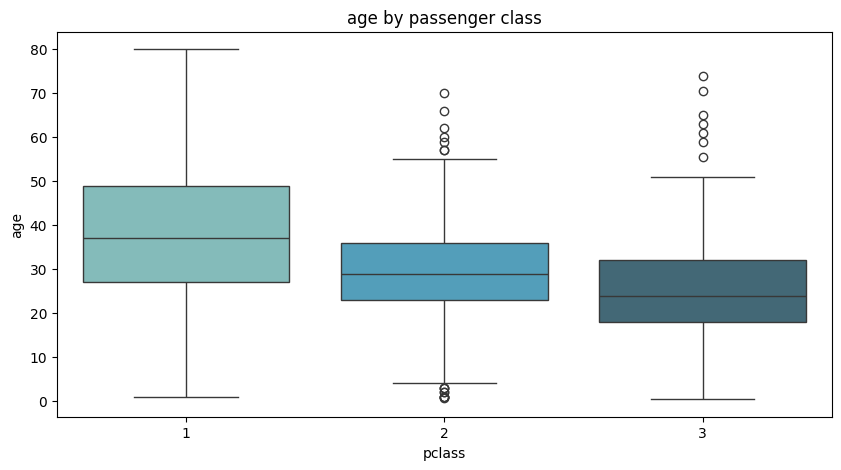

In [14]:
plt.rcParams["figure.figsize"] = [10,5]
sns.boxplot(x = 'pclass', y = 'age', data = full_data, palette= 'GnBu_d').set_title('age by passenger class')
plt.show()

import warnings
warnings.filterwarnings('ignore')

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)


The passengers in the higher classes tend to be older . We'll use the average age values to impute based on Pclass for Age.

In [15]:
# Imputation function
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):

        if pclass == 1:
            return 37

        elif pclass == 2:

            return 29

        else:
            return 24

    else:
        return age

# Apply the function to the Age column
full_data['age']=full_data[['age','pclass']].apply(impute_age, axis =1 )

In [16]:
# Remove rows with missing data
full_data.dropna(inplace = True)

In [17]:
print(full_data.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [18]:
full_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [19]:
# Remove unnecessary columns
full_data.drop(['class','who', 'adult_male', 'embark_town','alive', 'alone'], axis = 1, inplace = True)

In [20]:
full_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## **Visualize Data to Identify Outliers**

### **Box Plot**

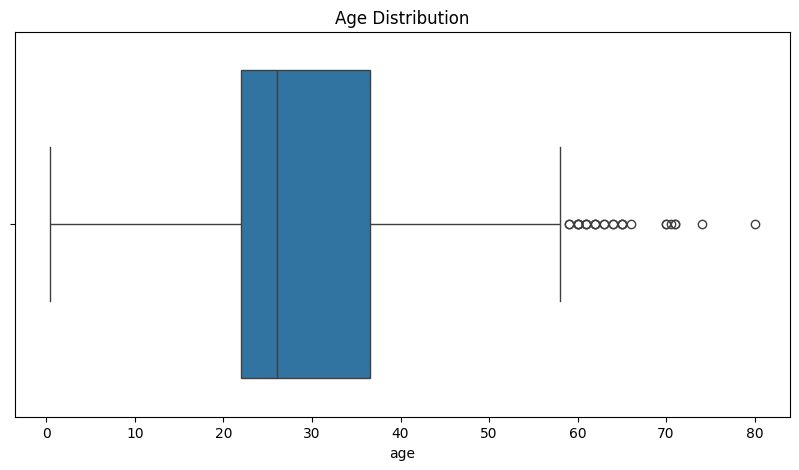

In [21]:
sns.boxplot(x=full_data['age'])
plt.title('Age Distribution')
plt.show()

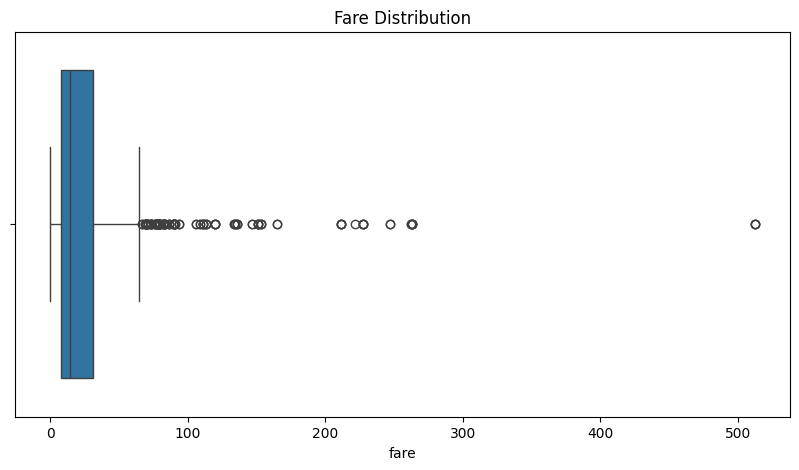

In [22]:
sns.boxplot(x=full_data['fare'])
plt.title('Fare Distribution')
plt.show()

### **Remove Outliers**

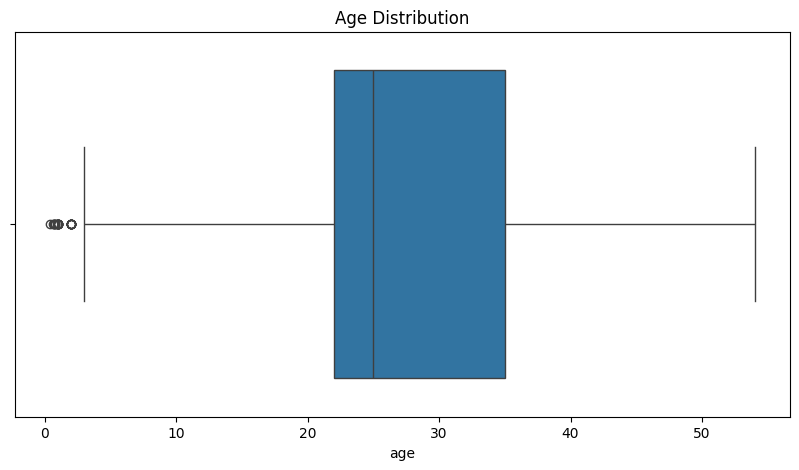

In [23]:
# Function to identify and remove outliers using IQR

import numpy as np
import pandas as pd

def remove_outliers_iqr(full_data, age, factor=1.5):
    Q1 = np.percentile(full_data[age].dropna(), 25)
    Q3 = np.percentile(full_data[age].dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    # Remove outliers
    full_data_cleaned = full_data[(full_data[age] >20)]
    full_data_cleaned = full_data[(full_data[age] <55)]
    return full_data_cleaned


full_data_cleaned = remove_outliers_iqr(full_data, 'age')

# Box plot for cleaned data
sns.boxplot(x= full_data_cleaned['age'])
plt.title('Age Distribution')
plt.show()


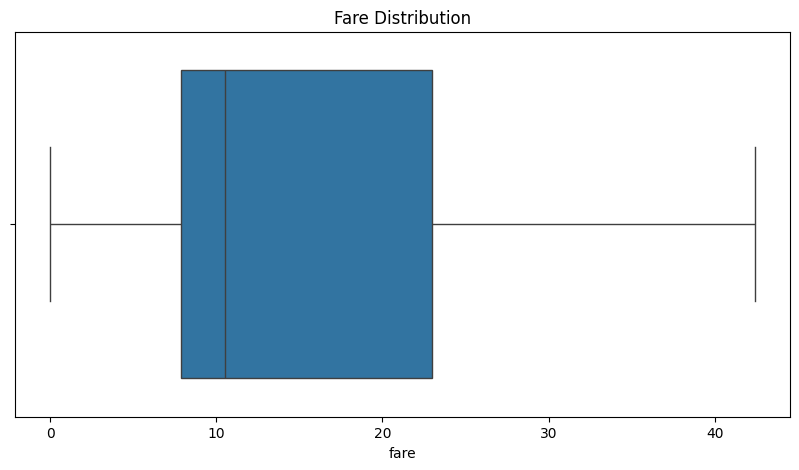

In [24]:
def remove_outliers_iqr(full_data, fare, factor=1.5):
    Q1 = np.percentile(full_data[fare].dropna(), 25)
    Q3 = np.percentile(full_data[fare].dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    # Remove outliers
    full_data_cleaned = full_data[(full_data[fare] <46)]

    return full_data_cleaned


full_data_cleaned = remove_outliers_iqr(full_data, 'fare')

# Box plot for cleaned data
sns.boxplot(x= full_data_cleaned['fare'])
plt.title('Fare Distribution')
plt.show()

## **Visualization Graphs**

## **Violinplot**

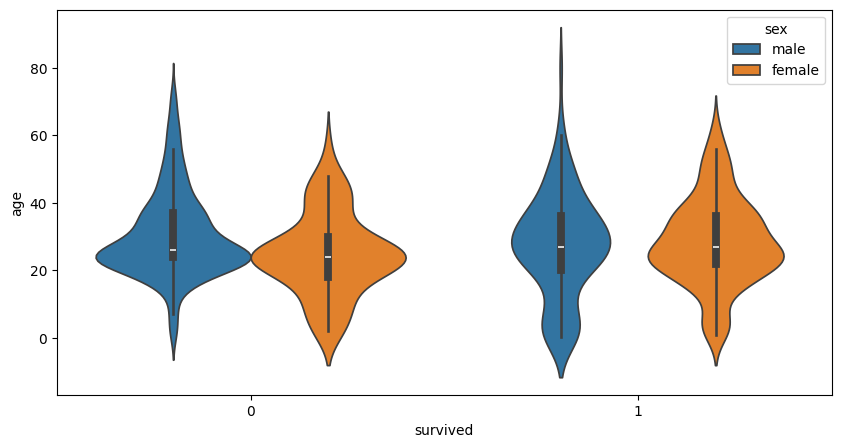

In [25]:
sns.violinplot(x ="survived", y ="age", hue= 'sex', data =full_data)
plt.show()

### **Kdeplot**

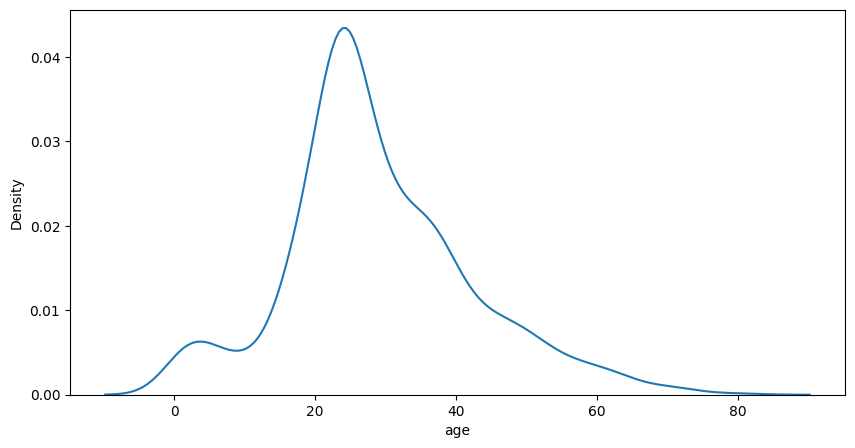

In [26]:
sns.distplot(full_data['age'], hist=False)
plt.show()

As we can see that most of the passenger has the age between 20 to 40

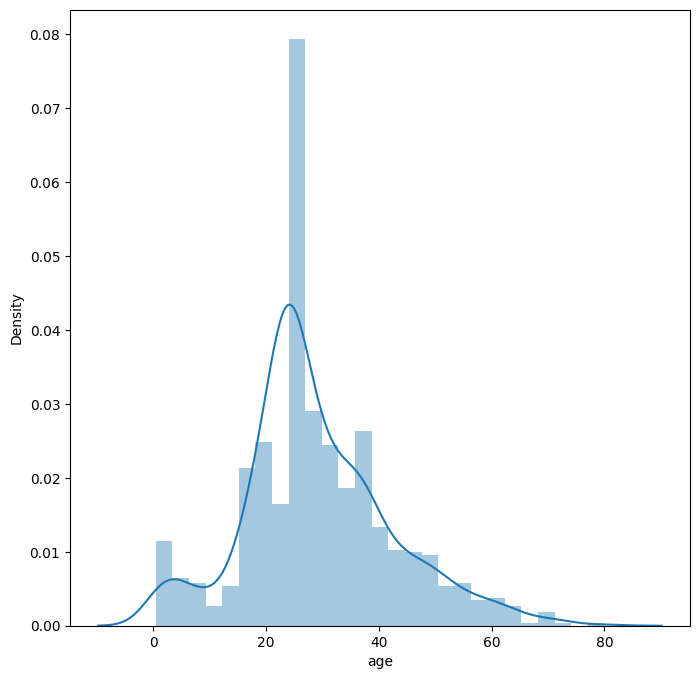

In [27]:
plt.figure(figsize=(8,8))
sns.distplot(full_data['age'])
plt.show()

### **Barplot**

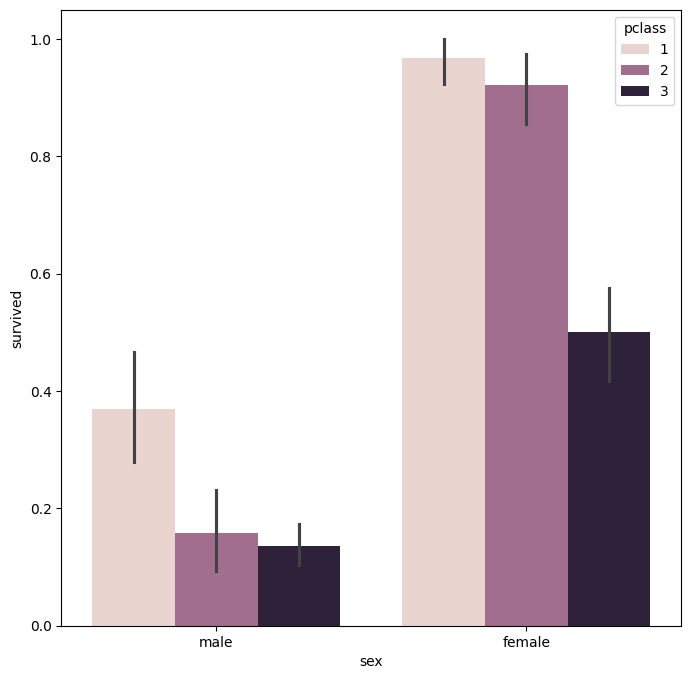

In [28]:
plt.figure(figsize=(8,8))
sns.barplot(x="sex", y="survived", hue="pclass", data=full_data)
plt.show()

### **Scatter Plot**

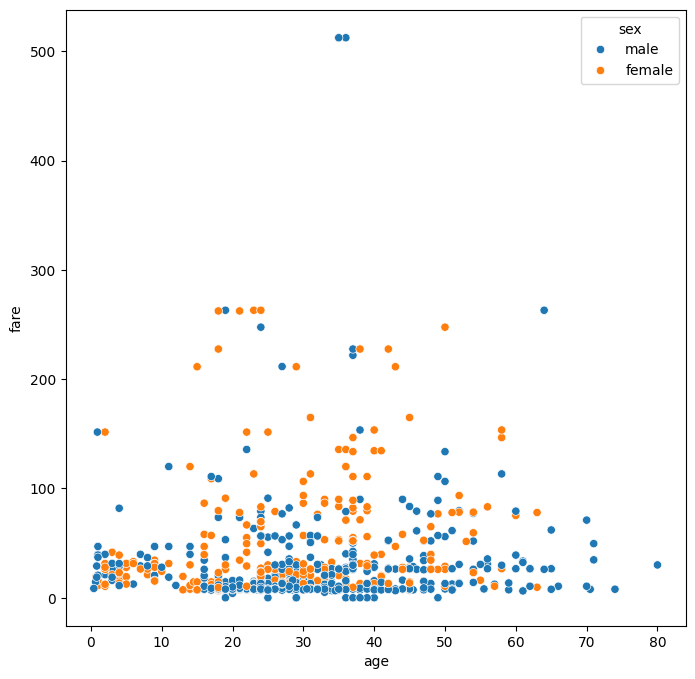

In [29]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="age", y="fare", hue="sex", data=full_data)
plt.show()

### **Histogram**

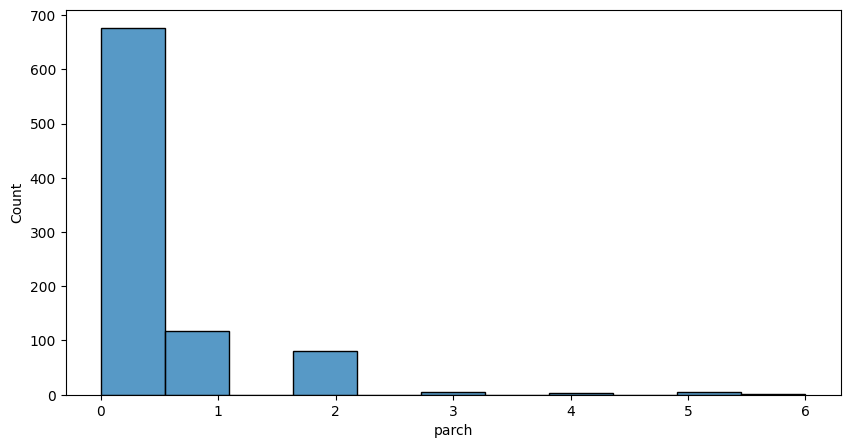

In [30]:
sns.histplot(full_data['parch'],kde=False)
plt.show()

As we can see that most passengers don't have neither parents nor children aboard.

### **Swarmplot**

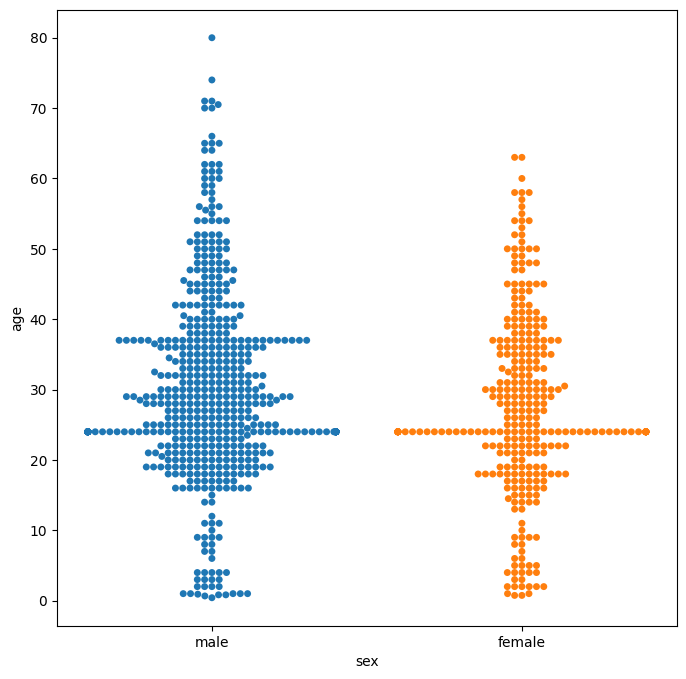

In [31]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="sex", y="age",hue='sex', data=full_data)
plt.show()

### **Correlation Heatmap**

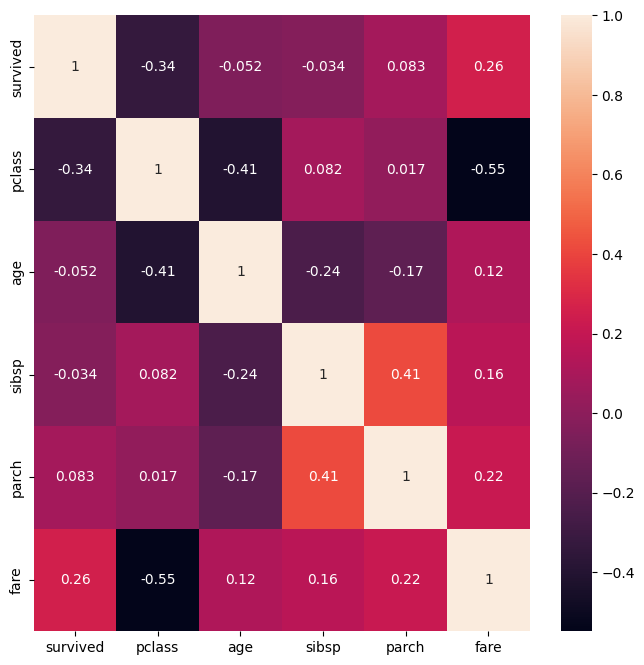

In [34]:
s = full_data.select_dtypes(include="number").corr()
plt.subplots(figsize=(8, 8))
sns.heatmap(s, annot=True)
plt.show()

**Conclusion:**

•	**Age and Fare:** A weak positive correlation, as fare increases, age might also tend to increase, but the connection is not very strong.

**•	Pclass and Fare:** A moderate negative correlation indicates an inverse relationship. Passengers in higher classes (denoted by lower Pclass values) typically paid more (higher fares).

•	**Sex_male and Survived:** Moderate negative correlation. This indicates that male passengers were less likely to survive compared to female passengers.


### **FaceGrid.Map**

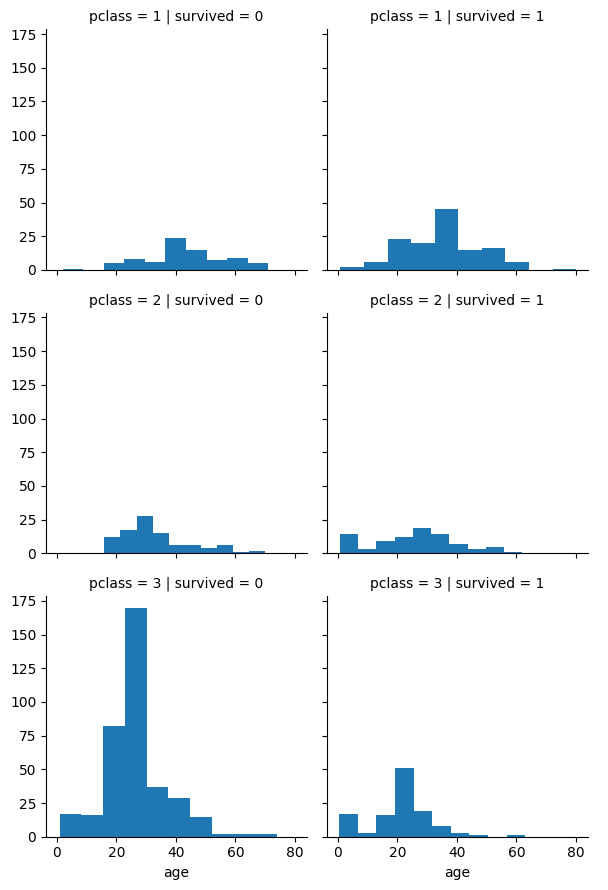

In [35]:
g = sns.FacetGrid(full_data, col='survived', row='pclass')

g.map(plt.hist, 'age')
g.add_legend()
plt.show()

## **Data Transformation**

In [36]:
full_data['sex'].unique()

array(['male', 'female'], dtype=object)

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False). set_output(transform = 'pandas')

In [39]:
ohetransform = ohe.fit_transform(full_data[['sex']])

In [40]:
ohetransform

,sex_female,sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [41]:
full_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [42]:
ohetransform.head()

,sex_female,sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [43]:
full_data = pd.concat([full_data, ohetransform], axis = 1). drop(columns = ['sex'])

In [44]:
full_data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,S,0.0,1.0
1,1,1,38.0,1,0,71.2833,C,1.0,0.0
2,1,3,26.0,0,0,7.9250,S,1.0,0.0
3,1,1,35.0,1,0,53.1000,S,1.0,0.0
4,0,3,35.0,0,0,8.0500,S,0.0,1.0


In [45]:
full_data['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False). set_output(transform = 'pandas')

In [48]:
ohetransform = ohe.fit_transform(full_data[['embarked']])

In [49]:
ohetransform

,embarked_C,embarked_Q,embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [50]:
full_data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,S,0.0,1.0
1,1,1,38.0,1,0,71.2833,C,1.0,0.0
2,1,3,26.0,0,0,7.9250,S,1.0,0.0
3,1,1,35.0,1,0,53.1000,S,1.0,0.0
4,0,3,35.0,0,0,8.0500,S,0.0,1.0


In [51]:
ohetransform.head()

,embarked_C,embarked_Q,embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [52]:
full_data = pd.concat([full_data, ohetransform], axis = 1). drop(columns = ['embarked'])

In [53]:
full_data.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


Now all the data is numeric and everything is concatenated together